# Importing Libraries :

In [1]:
# Importig the Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Data sets.
Fashion_test_df = pd.read_csv(R"C:\Users\Asus\Desktop\Deeplearning\fashion-mnist_test.csv",sep = ',')
Fashion_train_df = pd.read_csv(r"C:\Users\Asus\Desktop\Deeplearning\fashion-mnist_train.csv",sep = ',')

# Visualising the data set :

In [3]:
#Top five rows of the data set.
#Insted of Images we have the pixel's of images which define a particular product (Top,Sneaker,Dress etc) of the data set.
#Row 0 defines the Label tells us (Top,Sneaker,Dress etc)
Fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Botton five rows of the testing Data set.
Fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [5]:
#As you can see we have 60,000 observations and 784 rows tellin us pixel by pixel which product exist onw coloum for classificaton.
# Coloum with index 0 indicating classes of the proudcts.
Fashion_train_df.shape


(60000, 785)

In [6]:
#As you can see we have 10,000 observations and 785 rows like the training data set.
Fashion_test_df.shape

(10000, 785)

In [7]:
#Creating training and testing data set with floating values.
training = np.array(Fashion_train_df, dtype='float32')
testing = np.array(Fashion_test_df, dtype = 'float32')

In [ ]:
# Remember the 10 classes are  as follows:
# 0 = T-shirt/top
# 1 = Trouser
# 2 = Pullover
# 3 = Dress
# 4 = Coat
# 5 = Sandal
# 6 = Shirt
# 7 = Sneaker
# 8 = Bag
# 9 = Ankle boot

5.0

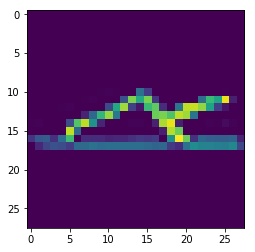

In [10]:
# now i am showing you how the images looks like from the data set.
#in this case the 7th object represents a sandal and label[5.0] confirms it.
plt.imshow(training[7, 1:].reshape(28, 28))
label = training[7, 0]
label

0.0

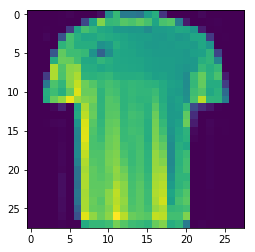

In [11]:
#In this case the 600 object is a Tshirt[0.0] even confirms it.
plt.imshow(training[600, 1:].reshape(28,28))
label = training[600,0]
label

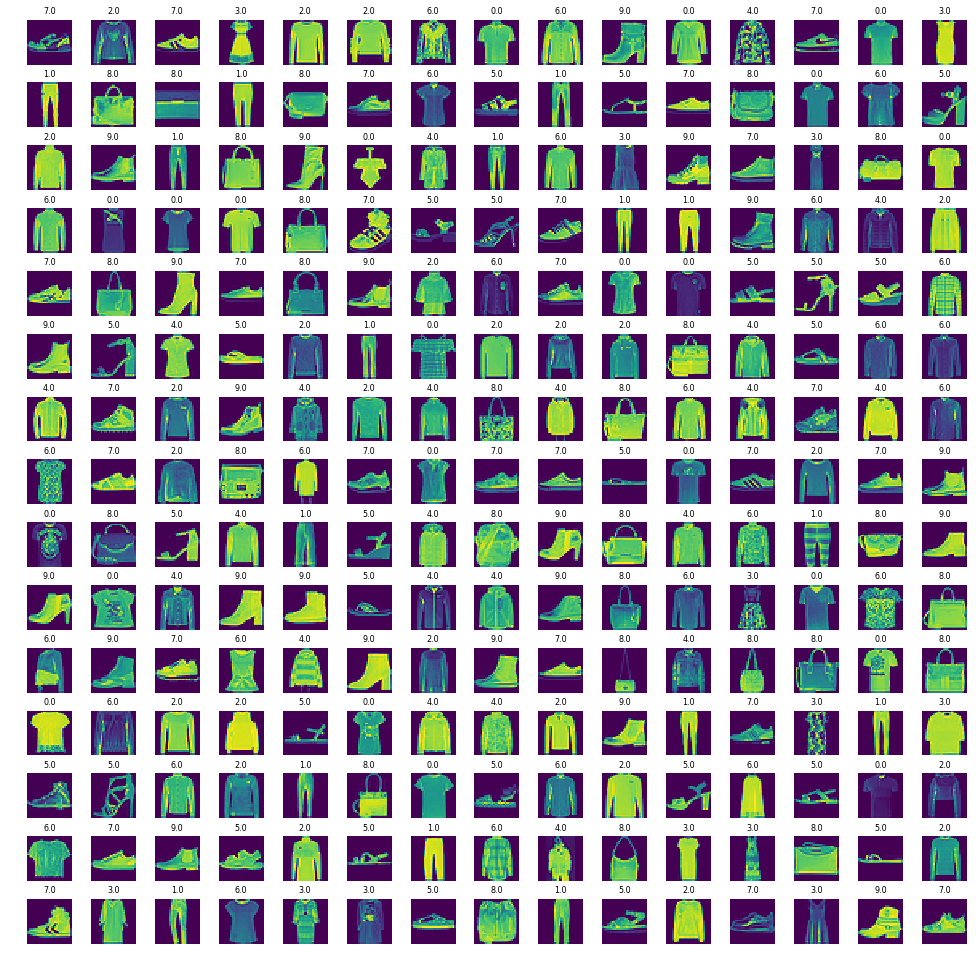

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
          

# Model Training 

In [13]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [14]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train, test_size=0.2, random_state = 12345)

In [ ]:
#After perfoming these steps we finally have our data in a array kind of format

In [17]:
#Reshaping my images into 28 by 28 grid.
X_train =X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [18]:
X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_validate.shape

(12000, 28, 28, 1)

In [21]:
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [24]:
cnn_model = Sequential()

In [25]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [26]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
#converting orginal data frame into 2,2 grid with out changing its features by pooling technique.

In [27]:
#taking the image and making it to a single array so we can feed it into the network
cnn_model.add(Flatten())

In [28]:
#hidden layer between the output Dense{demesionality of a particular layer}
#and the activation function is relu
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
#output layer with 10 demension since we have 10 observations and activation function used is sigmoid.
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [30]:
#using Adam optimizer with Sparse entropy which is use for classification of several products
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [31]:
#how many times you want your model to run in the batches of 512
epochs = 50 

In [32]:
cnn_model.fit(X_train,
             y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data = (X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.8870 - acc: 0.7157 - val_loss: 0.5302 - val_acc: 0.8070
Epoch 2/50
48000/48000 [==============================] - 11s 232us/step - loss: 0.4689 - acc: 0.8361 - val_loss: 0.4285 - val_acc: 0.8526
Epoch 3/50
48000/48000 [==============================] - 11s 232us/step - loss: 0.4157 - acc: 0.8553 - val_loss: 0.4181 - val_acc: 0.8542
Epoch 4/50
48000/48000 [==============================] - 11s 234us/step - loss: 0.3959 - acc: 0.8620 - val_loss: 0.3904 - val_acc: 0.8630
Epoch 5/50
48000/48000 [==============================] - 11s 233us/step - loss: 0.3698 - acc: 0.8710 - val_loss: 0.3664 - val_acc: 0.8747
Epoch 6/50
48000/48000 [==============================] - 11s 234us/step - loss: 0.3499 - acc: 0.8787 - val_loss: 0.3429 - val_acc: 0.8827
Epoch 7/50
48000/48000 [==============================] - 11s 231us/step - loss: 0.3402 - acc: 0.8812 - val_loss: 0.

# Evaluating the model

In [33]:
#Accuracy of the model we made
evaluation = cnn_model.evaluate(X_test, y_test)
print('test Accuracy :{:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 62us/step
test Accuracy :0.915


In [34]:
predicted_classes = cnn_model.predict_classes(X_test)

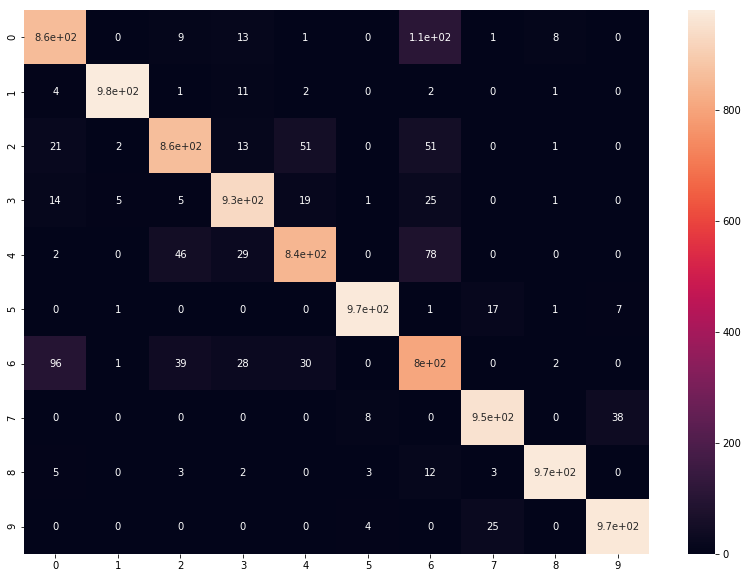

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [37]:
#classification report
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.86      0.88      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.89      0.84      0.87      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.74      0.80      0.77      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.96      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



In [ ]:

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot